## Смертность на титанике

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from MLP import NeuralNetwork, mse

### Подготовка данных

In [ ]:
features_train = []
prices = []

with open('./dataset/titanic/preprocessed_train.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    feature_titles = [key for key in reader.fieldnames if key != 'Survived']
    
    numerical_features = ['Age', 'Fare']
    selected_indices = [i for i, key in enumerate(feature_titles) if key in numerical_features]
    
    for row in reader:
        survived = float(row['Survived'])
        feature_values = [float(row[feature_titles[i]]) for i in selected_indices]
        
        features_train.append(feature_values)
        prices.append(survived)

features_train = np.array(features_train)
prices = np.array(prices).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    features_train, prices, 
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Обучение и предсказание

In [ ]:
input_layer_size = x_train.shape[1]
model = NeuralNetwork([input_layer_size, 64, 64, 1], 
                      activation='sigmoid',
                      task='classification')
loses = model.train(x_train, y_train, epochs=500, batch_size=32, learning_rate=0.01)

y_pred = model.predict(x_test)

Epoch 10/500, Loss: -0.0000
Epoch 20/500, Loss: -0.0000
Epoch 30/500, Loss: -0.0000
Epoch 40/500, Loss: -0.0000
Epoch 50/500, Loss: -0.0000
Epoch 60/500, Loss: -0.0000
Epoch 70/500, Loss: -0.0000
Epoch 80/500, Loss: -0.0000
Epoch 90/500, Loss: -0.0000
Epoch 100/500, Loss: -0.0000
Epoch 110/500, Loss: -0.0000
Epoch 120/500, Loss: -0.0000
Epoch 130/500, Loss: -0.0000
Epoch 140/500, Loss: -0.0000
Epoch 150/500, Loss: -0.0000
Epoch 160/500, Loss: -0.0000
Epoch 170/500, Loss: -0.0000
Epoch 180/500, Loss: -0.0000
Epoch 190/500, Loss: -0.0000
Epoch 200/500, Loss: -0.0000
Epoch 210/500, Loss: -0.0000
Epoch 220/500, Loss: -0.0000
Epoch 230/500, Loss: -0.0000
Epoch 240/500, Loss: -0.0000
Epoch 250/500, Loss: -0.0000
Epoch 260/500, Loss: -0.0000
Epoch 270/500, Loss: -0.0000
Epoch 280/500, Loss: -0.0000
Epoch 290/500, Loss: -0.0000
Epoch 300/500, Loss: -0.0000
Epoch 310/500, Loss: -0.0000
Epoch 320/500, Loss: -0.0000
Epoch 330/500, Loss: -0.0000
Epoch 340/500, Loss: -0.0000
Epoch 350/500, Loss: -0

### Визуализация

Test MSE: 0.5858


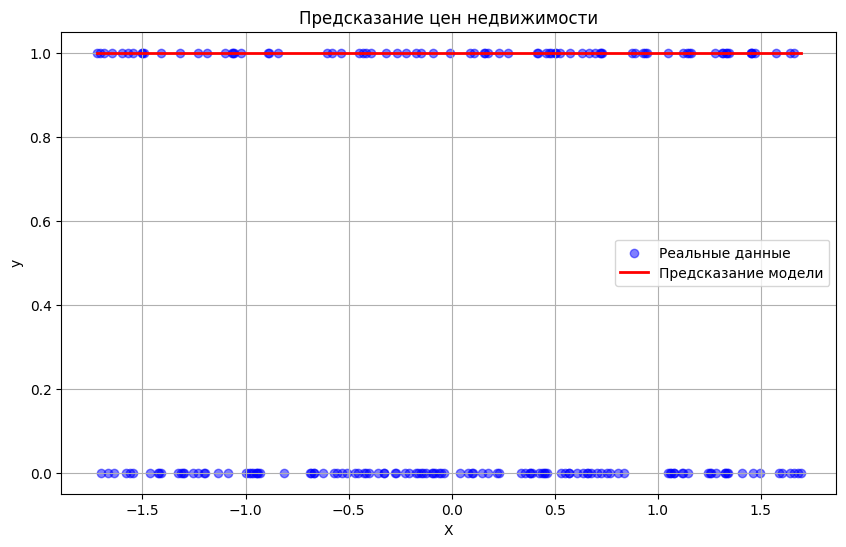

In [ ]:
test_loss = mse(y_test, y_pred)
print(f"Test MSE: {test_loss:.4f}")

sorted_indices = np.argsort(X_test_scaled[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[sorted_indices], y_test[sorted_indices], color='blue', alpha=0.5, label='Реальные данные')
plt.plot(X_test_scaled[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Предсказание модели')
plt.title('Предсказание цен недвижимости')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

